# Linear & Logistic Regression (Kaggle CSV) — learner- notebook

This notebook trains and evaluates:
- **Linear Regression** on Kaggle *Medical Cost Personal Datasets* (`insurance.csv`)
- **Logistic Regression** on Kaggle *Pima Indians Diabetes Database* (`diabetes.csv`)

## Before you run
1. Download the two CSVs from Kaggle:
   - Insurance (linear): https://www.kaggle.com/datasets/mirichoi0218/insurance
   - Diabetes (logistic): https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
2. Put **`insurance.csv`** and **`diabetes.csv`** in the *same folder* as this notebook.

✅ Check your brain's ability : Develop two models for the above datasets.

## 0) (Optional) Install/check libraries

**Line 1:** Install common packages (skip if already installed).
**Line 2:** Quick import check (will error if something is missing).

In [2]:
#!pip -q install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## 1) Imports we’ll reuse

**Line 1:** Utility split for train/test.
**Line 2:** Preprocessing + pipelines + models.

In [3]:
#!conda install sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer; from sklearn.preprocessing import OneHotEncoder, StandardScaler; from sklearn.pipeline import Pipeline; from sklearn.linear_model import LinearRegression, LogisticRegression

# Part A — Linear Regression (Insurance charges)

Target: **`charges`** (continuous)

## A1) Load `insurance.csv`

**Line 1:** Read the CSV and preview the first rows.
**Line 2:** Print basic shape (rows, columns).

In [4]:
ins = pd.read_csv('insurance.csv'); ins.head()
ins.shape

(1338, 7)

## A2) Split features/target and make train/test sets

**Line 1:** Separate `X` (inputs) and `y` (target).
**Line 2:** Create an 80/20 split (same dataset, different rows).

In [5]:
X_ins, y_ins = ins.drop(columns='charges'), ins['charges']
Xtr_i, Xte_i, ytr_i, yte_i = train_test_split(X_ins, y_ins, test_size=0.2, random_state=42)

# Train/test shapes
print('Xtr_i shape:', Xtr_i.shape)
print('Xte_i shape:', Xte_i.shape)
print('ytr_i shape:', ytr_i.shape)
print('yte_i shape:', yte_i.shape)


Xtr_i shape: (1070, 6)
Xte_i shape: (268, 6)
ytr_i shape: (1070,)
yte_i shape: (268,)


In [6]:
X_ins

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


## A3) Build a preprocessing + LinearRegression pipeline

**Line 1:** Declare numeric and categorical columns.
**Line 2:** Scale numeric + one-hot encode categorical.
**Line 3:** Combine preprocessing and model into one pipeline.
**Line 4:** Show the pipeline object.

In [7]:
num_i = ['age','bmi','children']; cat_i = ['sex','smoker','region']
pre_i = ColumnTransformer([('num', StandardScaler(), num_i), ('cat', OneHotEncoder(handle_unknown='ignore'), cat_i)])
lin_pipe = Pipeline([('pre', pre_i), ('model', LinearRegression())])
lin_pipe

,steps,"[('pre', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
# Inspect categorical values *after* one-hot encoding (Insurance)

# Fit the preprocessing block so we can inspect encoders/scalers
_ = pre_i.fit(Xtr_i)

ohe = pre_i.named_transformers_['cat']
print("OneHotEncoder categories learned from training data:")
for col, cats in zip(cat_i, ohe.categories_):
    print(f"  {col}: {list(cats)}")

# One-hot encoded matrix for the categorical columns (first 5 rows)
cat_ohe = ohe.transform(Xtr_i[cat_i])
cat_ohe_dense = cat_ohe.toarray() if hasattr(cat_ohe, "toarray") else np.asarray(cat_ohe)

cat_feature_names = ohe.get_feature_names_out(cat_i)
cat_ohe_df = pd.DataFrame(cat_ohe_dense, columns=cat_feature_names, index=Xtr_i.index)

cat_ohe_df.head()


OneHotEncoder categories learned from training data:
  sex: ['female', 'male']
  smoker: ['no', 'yes']
  region: ['northeast', 'northwest', 'southeast', 'southwest']


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# Inspect numeric values before vs after StandardScaler (Insurance)

scaler = pre_i.named_transformers_['num']  # StandardScaler fitted above

orig_num = Xtr_i[num_i].head().copy()
scaled_num = pd.DataFrame(
    scaler.transform(orig_num),
    columns=[f"{c}_scaled" for c in num_i],
    index=orig_num.index
)
pd.concat([orig_num, scaled_num], axis=1)

,age,bmi,children,age_scaled,bmi_scaled,children_scaled
560,46,19.95,2,0.472227,-1.756525,0.734336
1285,47,24.32,0,0.543313,-1.033082,-0.911192
1142,52,24.86,0,0.898745,-0.943687,-0.911192
969,39,34.32,5,-0.025379,0.622393,3.202629
486,54,21.47,3,1.040918,-1.504893,1.557100


## A4) Train and predict on the test split

**Line 1:** Fit the model and predict on `Xte_i`.
**Line 2:** Peek at the first 5 predictions.

In [11]:
lin_pipe.fit(Xtr_i, ytr_i); yhat_i = lin_pipe.predict(Xte_i)
yhat_i[:5]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

In [12]:
# (Educational) View an epoch-by-epoch training process (Insurance)
# Note: sklearn's LinearRegression is a closed-form solver (no epochs).
# This cell trains an *equivalent* linear model using SGD so you can see loss decreasing over epochs.

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

pre_fitted = lin_pipe.named_steps['pre']  # already fitted when lin_pipe.fit(...) ran
Xtr_t = pre_fitted.transform(Xtr_i)
Xte_t = pre_fitted.transform(Xte_i)

# Convert to dense for SGD (small datasets are fine)
Xtr_t = Xtr_t.toarray() if hasattr(Xtr_t, "toarray") else np.asarray(Xtr_t)
Xte_t = Xte_t.toarray() if hasattr(Xte_t, "toarray") else np.asarray(Xte_t)

sgd_reg = SGDRegressor(
    loss="squared_error",
    penalty=None,
    random_state=42,
    learning_rate="invscaling",
    eta0=0.01,
)

EPOCHS = 1000
PRINT_EVERY = 100

print("Epoch |   MSE (test)   |   R² (test)")
for epoch in range(1, EPOCHS + 1):
    sgd_reg.partial_fit(Xtr_t, ytr_i)
    if epoch == 1 or epoch % PRINT_EVERY == 0:
        ypred = sgd_reg.predict(Xte_t)
        mse = mean_squared_error(yte_i, ypred)
        r2 = r2_score(yte_i, ypred)
        print(f"{epoch:5d} | {mse:13,.2f} | {r2:10.4f}")


Epoch |   MSE (test)   |   R² (test)
    1 | 66,151,473.33 |     0.5739
  100 | 33,523,295.87 |     0.7841
  200 | 33,533,529.18 |     0.7840
  300 | 33,538,993.52 |     0.7840
  400 | 33,542,634.77 |     0.7839
  500 | 33,545,325.91 |     0.7839
  600 | 33,547,439.65 |     0.7839
  700 | 33,549,168.04 |     0.7839
  800 | 33,550,622.41 |     0.7839
  900 | 33,551,872.74 |     0.7839
 1000 | 33,552,965.73 |     0.7839


In [13]:
# Trained weights & bias (Linear Regression on Insurance)
pre = lin_pipe.named_steps['pre']
model = lin_pipe.named_steps['model']

feature_names = pre.get_feature_names_out()
weights = model.coef_.ravel()
bias = float(model.intercept_)

w_df = pd.DataFrame({'feature': feature_names, 'weight': weights})
w_df['abs_weight'] = w_df['weight'].abs()

print(f"Bias (intercept): {bias:,.4f}")
w_df.sort_values('abs_weight', ascending=False).drop(columns='abs_weight')


Bias (intercept): 20,311.9281


,feature,weight
6,cat__smoker_yes,11825.564428
5,cat__smoker_no,-11825.564428
0,num__age,3614.975415
1,num__bmi,2036.228123
2,num__children,516.890247
7,cat__region_northeast,459.585244
10,cat__region_southwest,-350.214110
9,cat__region_southeast,-198.279052
8,cat__region_northwest,88.907918
4,cat__sex_male,-9.295846


In [14]:
# Model "shape" + memory size (Linear Regression on Insurance)

coef = lin_pipe.named_steps['model'].coef_
intercept = np.array(lin_pipe.named_steps['model'].intercept_)

n_params = coef.size + intercept.size
mem_bytes = coef.nbytes + intercept.nbytes

print("Coefficient array shape:", coef.shape)
print("Intercept shape:", intercept.shape)
print("Total parameters:", n_params)
print(f"Approx parameter memory: {mem_bytes} bytes ({mem_bytes/1024:.2f} KB)")


Coefficient array shape: (11,)
Intercept shape: ()
Total parameters: 12
Approx parameter memory: 96 bytes (0.09 KB)


## A5) Performance metrics (R², MAE, RMSE)

**Line 1:** Import regression metrics (including `root_mean_squared_error`).
**Line 2:** Compute R² and MAE.
**Line 3:** Compute RMSE.
**Line 4:** Display a tidy dictionary of results.


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
r2 = r2_score(yte_i, yhat_i); mae = mean_absolute_error(yte_i, yhat_i)
rmse = root_mean_squared_error(yte_i, yhat_i)
{'R2': r2, 'MAE': mae, 'RMSE': rmse}


{'R2': 0.7835929767120723, 'MAE': 4181.19447375365, 'RMSE': 5796.2846592762735}

## A6) Visualization: Actual vs Predicted

**Line 1:** Scatter plot of actual vs predicted.
**Line 2:** Add a diagonal reference line.
**Line 3:** Labels + title.
**Line 4:** Render the plot.

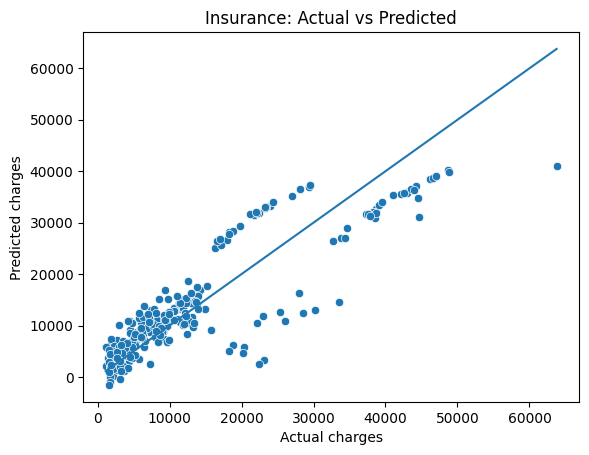

In [16]:
plt.figure(); sns.scatterplot(x=yte_i, y=yhat_i)
plt.plot([yte_i.min(), yte_i.max()], [yte_i.min(), yte_i.max()])
plt.xlabel('Actual charges'); plt.ylabel('Predicted charges'); plt.title('Insurance: Actual vs Predicted')
plt.show()

## A7) Visualization: Residual distribution

**Line 1:** Compute residuals and plot their histogram.
**Line 2:** Add title and show.

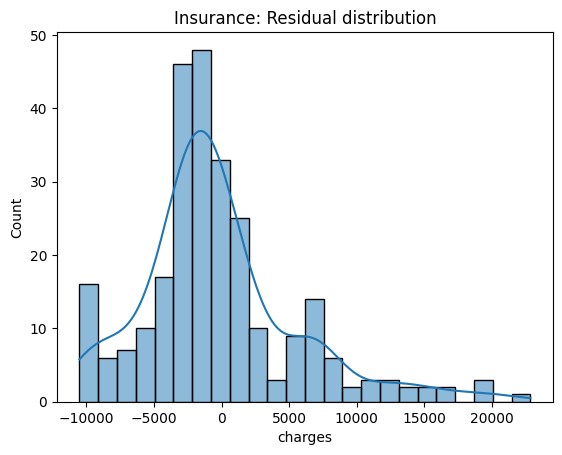

In [15]:
res_i = yte_i - yhat_i; plt.figure(); sns.histplot(res_i, kde=True)
plt.title('Insurance: Residual distribution'); plt.show()

### How to read the residual histogram (and why it matters)

A **residual** is:

> residual = actual − predicted

The histogram shows how those residuals are distributed.

What to look for:

- **Centered near 0**: If the peak is near 0, the model is not consistently *over* or *under* predicting.
- **Spread / width**: A narrow distribution means predictions are usually close to the true values; a wide one means larger typical errors.
- **Skewness**: If the histogram has a long tail to one side, the model’s errors are asymmetric (e.g., it underpredicts very expensive cases).
- **Outliers**: A few extreme residuals can indicate unusual examples the model can’t explain well (or potential data issues).
- **Multi-modal shape**: Multiple peaks can hint at missing subgroups/features (e.g., different “segments” of patients).

In short: the residual histogram helps you judge **bias** (center), **typical error** (spread), and **systematic failure modes** (skew/outliers), which you won’t fully see from a single metric like RMSE.


In [18]:
# Confidence helper for Insurance predictions (approximate)
# NOTE: Classic LinearRegression doesn't output a true probabilistic confidence by default.
# This cell builds a *simple, educational* confidence estimate using:
#  - training residual spread (to form an approximate 95% prediction interval)
#  - how "in-distribution" the input is (based on training feature ranges)

# 1) Residual-based uncertainty estimate
ytr_pred = lin_pipe.predict(Xtr_i)
res_tr = (ytr_i - ytr_pred)
res_sigma = float(np.std(res_tr, ddof=1))

# 2) In-distribution checks (numeric z-scores + seen categories)
num_summary = pd.DataFrame({
    'mean': Xtr_i[num_i].mean(),
    'std':  Xtr_i[num_i].std(ddof=1),
    'q01':  Xtr_i[num_i].quantile(0.01),
    'q99':  Xtr_i[num_i].quantile(0.99),
})

cat_seen = {c: set(Xtr_i[c].astype(str).str.strip().str.lower().unique()) for c in cat_i}

def insurance_predict_with_confidence(X_new: pd.DataFrame):
    """Returns prediction, approximate 95% PI, and a simple confidence label."""
    pred = float(lin_pipe.predict(X_new)[0])

    # z-score distance for numeric features
    z = ((X_new[num_i].iloc[0] - num_summary['mean']) / num_summary['std']).abs()
    n_z2 = int((z > 2).sum())
    n_z3 = int((z > 3).sum())

    # unseen categories (still handled by OneHotEncoder(handle_unknown='ignore') but less reliable)
    unseen = 0
    for c in cat_i:
        v = str(X_new[c].iloc[0]).strip().lower()
        if v not in cat_seen[c]:
            unseen += 1

    # approximate 95% prediction interval from residual spread
    half_width = 1.96 * res_sigma
    lo, hi = pred - half_width, pred + half_width

    # heuristic confidence score in [0,1]
    score = 1.0
    score -= 0.12 * n_z2
    score -= 0.20 * n_z3
    score -= 0.15 * unseen
    score = float(np.clip(score, 0.0, 1.0))

    label = "High" if score >= 0.75 else ("Medium" if score >= 0.50 else "Low")
    return pred, (lo, hi), score, label, z.to_dict(), unseen

print(f"Training residual σ (used for ~95% PI): {res_sigma:,.2f}")


Training residual σ (used for ~95% PI): 6,108.40


## A8) Input-based test interface (Insurance)

Run this cell, type values when prompted (examples are shown), and you’ll get a prediction.

**Line 1:** Ask for `age`, `sex`, `bmi`.
**Line 2:** Ask for `children`, `smoker`, `region`.
**Line 3:** Build a 1-row DataFrame and predict.


In [19]:
# Try a custom Insurance example (with a simple confidence estimate)
age = int(input("age (e.g., 30): "))
sex = input("sex [male/female] (e.g., male): ").strip().lower()
bmi = float(input("bmi (e.g., 28.5): "))
children = int(input("children (e.g., 1): "))
smoker = input("smoker [yes/no] (e.g., no): ").strip().lower()
region = input("region [southeast/southwest/northwest/northeast] (e.g., southeast): ").strip().lower()

X_new = pd.DataFrame([{
    "age": age,
    "sex": sex,
    "bmi": bmi,
    "children": children,
    "smoker": smoker,
    "region": region,
}])

pred, (lo, hi), score, label, z_dict, unseen = insurance_predict_with_confidence(X_new)

print(f"Predicted charges: {pred:,.0f}")
print(f"Approx 95% prediction interval: [{lo:,.0f}, {hi:,.0f}]")
print(f"Confidence (heuristic): {label} (score={score:.2f})")

if unseen:
    print("Note: at least one categorical value was unseen in the training data → lower confidence.")

print("Numeric feature z-scores vs training distribution (|z| > 2 is getting unusual):")
for k, v in z_dict.items():
    print(f"  {k}: {v:.2f}")


age (e.g., 30):  40
sex [male/female] (e.g., male):  male
bmi (e.g., 28.5):  25
children (e.g., 1):  1
smoker [yes/no] (e.g., no):  yes
region [southeast/southwest/northwest/northeast] (e.g., southeast):  southeast


Predicted charges: 30,175
Approx 95% prediction interval: [18,203, 42,148]
Confidence (heuristic): High (score=1.00)
Numeric feature z-scores vs training distribution (|z| > 2 is getting unusual):
  age: 0.05
  bmi: 0.92
  children: 0.09


# Part B — Logistic Regression (Diabetes Outcome)

Target: **`Outcome`** (0/1 classification)

## B1) Load `diabetes.csv`

**Line 1:** Read the CSV and preview.
**Line 2:** Show class counts (Outcome=0 vs Outcome=1).

In [20]:
dia = pd.read_csv('diabetes.csv'); dia.head()
dia['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [21]:
dia.shape

(768, 9)

## B2) Split features/target and make stratified train/test sets

**Line 1:** Separate `X` and `y`.
**Line 2:** 80/20 split while preserving class ratio using `stratify`.

In [22]:
X_dia, y_dia = dia.drop(columns='Outcome'), dia['Outcome']
Xtr_d, Xte_d, ytr_d, yte_d = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42, stratify=y_dia)

# Train/test shapes
print('Xtr_d shape:', Xtr_d.shape)
print('Xte_d shape:', Xte_d.shape)
print('ytr_d shape:', ytr_d.shape)
print('yte_d shape:', yte_d.shape)


Xtr_d shape: (614, 8)
Xte_d shape: (154, 8)
ytr_d shape: (614,)
yte_d shape: (154,)


## B3) Build a StandardScaler + LogisticRegression pipeline, then train

**Line 1:** Scale all numeric columns.
**Line 2:** Build pipeline and train.
**Line 3:** Get probabilities + class predictions (threshold 0.5).

In [23]:
pre_d = ColumnTransformer([('num', StandardScaler(), X_dia.columns)])
log_pipe = Pipeline([('pre', pre_d), ('model', LogisticRegression(max_iter=2000))])
log_pipe.fit(Xtr_d, ytr_d)
proba_d = log_pipe.predict_proba(Xte_d)[:,1]
pred_d = (proba_d >= 0.5).astype(int)

In [24]:
# Inspect values before vs after StandardScaler (Diabetes)
pre = log_pipe.named_steps['pre']
scaler = pre.named_transformers_['num']  # StandardScaler

orig = Xtr_d.head().copy()
scaled = pd.DataFrame(
    scaler.transform(orig),
    columns=[f"{c}_scaled" for c in Xtr_d.columns],
    index=orig.index
)

pd.concat([orig, scaled], axis=1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_scaled,Glucose_scaled,BloodPressure_scaled,SkinThickness_scaled,Insulin_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled,Age_scaled
353,1,90,62,12,43,27.2,0.580,24,-0.851355,-0.980131,-0.404784,-0.553973,-0.331319,-0.607678,0.310794,-0.792169
711,5,126,78,27,22,29.6,0.439,40,0.356576,0.161444,0.465368,0.392787,-0.526398,-0.302139,-0.116439,0.561034
373,2,105,58,40,94,34.9,0.225,25,-0.549372,-0.504474,-0.622322,1.213312,0.142444,0.372594,-0.764862,-0.707594
46,1,146,56,0,0,29.7,0.564,29,-0.851355,0.795653,-0.731091,-1.311380,-0.730766,-0.289408,0.262314,-0.369293
682,0,95,64,39,105,44.6,0.366,22,-1.153338,-0.821579,-0.296015,1.150195,0.244628,1.607482,-0.337630,-0.961320


In [25]:
# (Educational) View an epoch-by-epoch training process (Diabetes)
# Note: sklearn's LogisticRegression uses an internal solver.
# This cell trains an equivalent logistic model using SGD so you can see loss/accuracy over epochs.

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# Use the SAME scaled inputs as the pipeline
Xtr_s = scaler.transform(Xtr_d)
Xte_s = scaler.transform(Xte_d)

Xtr_s = np.asarray(Xtr_s)
Xte_s = np.asarray(Xte_s)

sgd_clf = SGDClassifier(
    loss="log_loss",
    penalty=None,
    random_state=42,
    learning_rate="optimal",
)

EPOCHS = 1000
PRINT_EVERY = 100

print("Epoch | log-loss (test) | accuracy (test)")
for epoch in range(1, EPOCHS + 1):
    # partial_fit needs class labels on the first call
    if epoch == 1:
        sgd_clf.partial_fit(Xtr_s, ytr_d, classes=np.array([0, 1]))
    else:
        sgd_clf.partial_fit(Xtr_s, ytr_d)

    if epoch == 1 or epoch % PRINT_EVERY == 0:
        p = sgd_clf.predict_proba(Xte_s)[:, 1]
        y = (p >= 0.5).astype(int)
        ll = log_loss(yte_d, p)
        acc = accuracy_score(yte_d, y)
        print(f"{epoch:5d} | {ll:13.4f} | {acc:14.4f}")


Epoch | log-loss (test) | accuracy (test)
    1 |        9.2716 |         0.6364
  100 |        0.5989 |         0.6948
  200 |        0.5466 |         0.7338
  300 |        0.5283 |         0.7403
  400 |        0.5195 |         0.7208
  500 |        0.5142 |         0.7143
  600 |        0.5105 |         0.7208
  700 |        0.5078 |         0.7143
  800 |        0.5057 |         0.7143
  900 |        0.5041 |         0.7078
 1000 |        0.5028 |         0.7078


In [26]:
# Trained weights & bias (Logistic Regression on Diabetes)

pre = log_pipe.named_steps['pre']
model = log_pipe.named_steps['model']

feature_names = pre.get_feature_names_out()
weights = model.coef_.ravel()
bias = float(model.intercept_.ravel()[0])

w_df = pd.DataFrame({'feature': feature_names, 'weight': weights})
w_df['abs_weight'] = w_df['weight'].abs()

print(f"Bias (intercept): {bias:,.4f}")
w_df.sort_values('abs_weight', ascending=False).drop(columns='abs_weight')


Bias (intercept): -0.8750


,feature,weight
1,num__Glucose,1.144151
5,num__BMI,0.713893
0,num__Pregnancies,0.373178
6,num__DiabetesPedigreeFunction,0.255527
2,num__BloodPressure,-0.197637
7,num__Age,0.184179
4,num__Insulin,-0.127308
3,num__SkinThickness,0.066535


In [27]:
# Model "shape" + memory size (Logistic Regression on Diabetes)

coef = log_pipe.named_steps['model'].coef_
intercept = np.array(log_pipe.named_steps['model'].intercept_)

n_params = coef.size + intercept.size
mem_bytes = coef.nbytes + intercept.nbytes

print("Coefficient array shape:", coef.shape)
print("Intercept shape:", intercept.shape)
print("Total parameters:", n_params)
print(f"Approx parameter memory: {mem_bytes} bytes ({mem_bytes/1024:.2f} KB)")


Coefficient array shape: (1, 8)
Intercept shape: (1,)
Total parameters: 9
Approx parameter memory: 72 bytes (0.07 KB)


## B4) Classification metrics + confusion matrix

**Line 1:** Import metrics.
**Line 2:** Compute key scores in a dictionary.
**Line 3:** Print scores.
**Line 4:** Create confusion matrix for plotting next.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
m = {'Accuracy': accuracy_score(yte_d,pred_d), 'Precision': precision_score(yte_d,pred_d), 'Recall': recall_score(yte_d,pred_d), 'F1': f1_score(yte_d,pred_d), 'ROC_AUC': roc_auc_score(yte_d,proba_d)}
m
cm = confusion_matrix(yte_d, pred_d); cm

array([[82, 18],
       [26, 28]], dtype=int64)

## B5) Visualization: Confusion matrix heatmap

**Line 1:** Plot heatmap.
**Line 2:** Show.

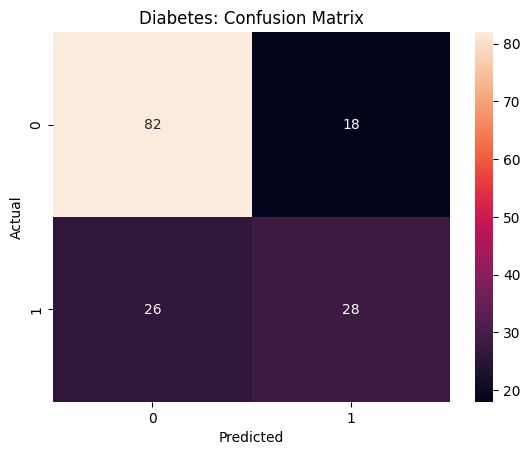

In [29]:
plt.figure(); sns.heatmap(cm, annot=True, fmt='d'); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Diabetes: Confusion Matrix')
plt.show()

## B6) Visualization: ROC curve

**Line 1:** Draw ROC from true labels + probabilities.
**Line 2:** Show.

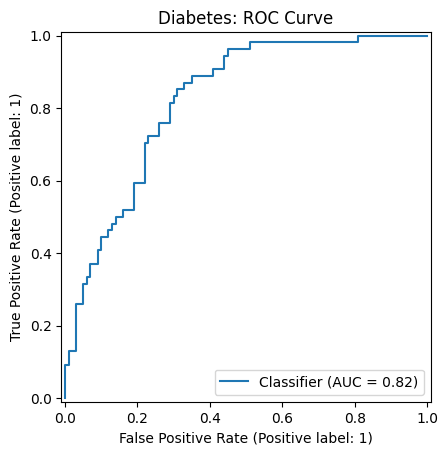

In [30]:
RocCurveDisplay.from_predictions(yte_d, proba_d); plt.title('Diabetes: ROC Curve')
plt.show()

In [31]:
# Confidence helper for Diabetes predictions (based on probability margin + in-distribution check)

# In-distribution summary (original feature space)
dia_summary = pd.DataFrame({
    'mean': Xtr_d.mean(),
    'std':  Xtr_d.std(ddof=1),
    'q01':  Xtr_d.quantile(0.01),
    'q99':  Xtr_d.quantile(0.99),
})

def diabetes_confidence(p: float, X_new: pd.DataFrame):
    """Heuristic confidence from probability + how unusual the inputs are."""
    # 1) probability margin (0.5 => 0 confidence, 0/1 => high confidence)
    margin = abs(p - 0.5) * 2  # in [0,1]

    # 2) z-score distance for numeric features
    z = ((X_new.iloc[0] - dia_summary['mean']) / dia_summary['std']).abs()
    n_z2 = int((z > 2).sum())
    n_z3 = int((z > 3).sum())

    score = float(margin)
    score -= 0.06 * n_z2
    score -= 0.10 * n_z3
    score = float(np.clip(score, 0.0, 1.0))

    label = "High" if score >= 0.75 else ("Medium" if score >= 0.50 else "Low")
    return score, label, z.to_dict()

print("Confidence idea: higher probability away from 0.5 + more in-distribution inputs => higher confidence.")


Confidence idea: higher probability away from 0.5 + more in-distribution inputs => higher confidence.


## B7) Input-based test interface (Diabetes)

Run this cell, type values when prompted (examples are shown), and you’ll get a probability + class.

**Line 1:** Ask for the 4 first inputs.
**Line 2:** Ask for the remaining 4 inputs.
**Line 3:** Build a 1-row DataFrame, then predict probability and class.


In [32]:
# Try a custom Diabetes example (with a simple confidence estimate)

P = int(input("Pregnancies (e.g., 2): "))
G = float(input("Glucose (e.g., 120): "))
BP = float(input("BloodPressure (e.g., 70): "))
ST = float(input("SkinThickness (e.g., 20): "))
I = float(input("Insulin (e.g., 85): "))
BMI = float(input("BMI (e.g., 30.0): "))
DPF = float(input("DiabetesPedigreeFunction (e.g., 0.35): "))
A = int(input("Age (e.g., 33): "))

X_new = pd.DataFrame([{
    "Pregnancies": P,
    "Glucose": G,
    "BloodPressure": BP,
    "SkinThickness": ST,
    "Insulin": I,
    "BMI": BMI,
    "DiabetesPedigreeFunction": DPF,
    "Age": A,
}])

p = float(log_pipe.predict_proba(X_new)[0, 1])
y = int(log_pipe.predict(X_new)[0])
score, label, z_dict = diabetes_confidence(p, X_new)

print(f"P(diabetes=1): {p:.3f} | Predicted class: {y}")
print(f"Confidence (heuristic): {label} (score={score:.2f})")

print("Feature z-scores vs training distribution (|z| > 2 is getting unusual):")
for k, v in z_dict.items():
    print(f"  {k}: {v:.2f}")


Pregnancies (e.g., 2):  1
Glucose (e.g., 120):  100
BloodPressure (e.g., 70):  70
SkinThickness (e.g., 20):  20
Insulin (e.g., 85):  65
BMI (e.g., 30.0):  25
DiabetesPedigreeFunction (e.g., 0.35):  0.35
Age (e.g., 33):  30


P(diabetes=1): 0.061 | Predicted class: 0
Confidence (heuristic): High (score=0.88)
Feature z-scores vs training distribution (|z| > 2 is getting unusual):
  Pregnancies: 0.85
  Glucose: 0.66
  BloodPressure: 0.03
  SkinThickness: 0.05
  Insulin: 0.13
  BMI: 0.89
  DiabetesPedigreeFunction: 0.39
  Age: 0.28


---
### Notes
- Everything uses **train/test split on the same dataset** (no external validation set).
- The input-based interface uses Python’s `input()` prompts (works in classic Jupyter Notebook and most JupyterLab setups).
